In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [5]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [7]:
# For simplicity, select only two classes and two features (binary classification)
X = X[y != 2, :2]  # Use classes 0 and 1 only, and the first two features
y = y[y != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


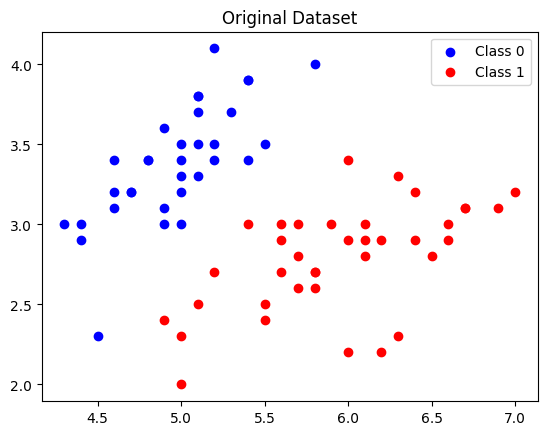

In [8]:
# Visualize the original dataset
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color="blue", label="Class 0")
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color="red", label="Class 1")
plt.title("Original Dataset")
plt.legend()
plt.show()

In [9]:
# Poison the training data
poisoning_ratio = 0.2  # 20% of the data will be poisoned
n_poison = int(len(X_train) * poisoning_ratio)

# Select data points to poison
np.random.seed(42)
poison_indices = np.random.choice(len(X_train), n_poison, replace=False)

# Flip their labels
y_train_poisoned = y_train.copy()
y_train_poisoned[poison_indices] = 1 - y_train_poisoned[poison_indices]  # Flip 0 to 1 and vice versa


In [10]:

# Visualize decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=20)
    plt.title(title)
    plt.show()


Clean Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Poisoned Model Performance:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        17
           1       0.72      1.00      0.84        13

    accuracy                           0.83        30
   macro avg       0.86      0.85      0.83        30
weighted avg       0.88      0.83      0.83        30



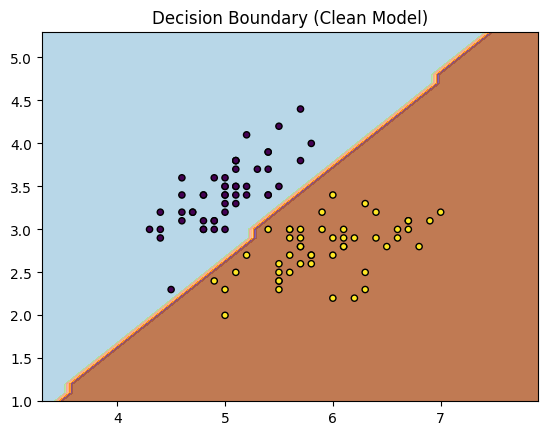

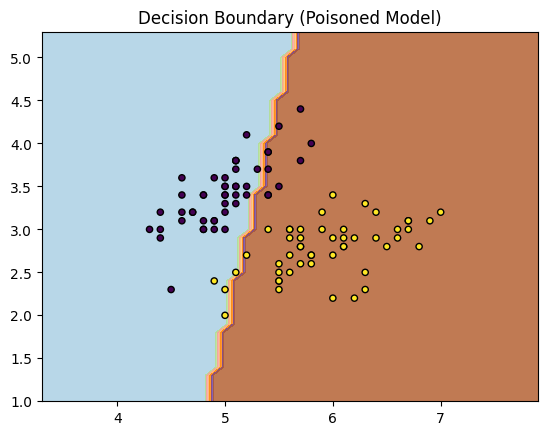

In [12]:
# Train models on original and poisoned data
model_clean = LogisticRegression()
model_poisoned = LogisticRegression()

model_clean.fit(X_train, y_train)
model_poisoned.fit(X_train, y_train_poisoned)

# Evaluate both models
y_pred_clean = model_clean.predict(X_test)
y_pred_poisoned = model_poisoned.predict(X_test)

print("Clean Model Performance:")
print(classification_report(y_test, y_pred_clean))
print("Poisoned Model Performance:")
print(classification_report(y_test, y_pred_poisoned))

plot_decision_boundary(model_clean, X, y, "Decision Boundary (Clean Model)")
plot_decision_boundary(model_poisoned, X, y, "Decision Boundary (Poisoned Model)")